<a href="https://colab.research.google.com/github/Montaser778/CNN_CIFAR10/blob/main/Lab5_CNN_CIFAR10_Montaser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 5: CNN for Image Classification (Advanced Solution)**
This lab focuses on building and comparing **different CNN architectures** to classify images from the **CIFAR-10 dataset**.

We will train, evaluate, and analyze multiple models to determine the best-performing architecture.

##  **1. Loading and Preparing the CIFAR-10 Dataset**


The CIFAR-10 dataset contains 60,000 color images of size 32x32 pixels, divided into 10 classes.  
We’ll begin by loading the dataset, normalizing the image values, and converting the labels into one-hot encoded format.


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


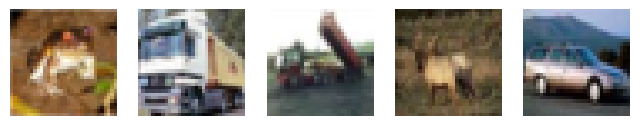

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize images (values between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Show a few sample images
plt.figure(figsize=(8, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

## **2. Define and Compare CNN Models**

##  Building CNN Architectures

The following function `create_cnn(model_type='simple')` allows us to build **three different CNN architectures**:
- **Simple CNN**
- **Medium CNN**
- **Advanced CNN**

Each architecture increases in complexity to compare performance and training efficiency.

---

###  CNN Model Generator Function

In [ ]:
def create_cnn(model_type='simple'):
    model = models.Sequential()
    if model_type == 'simple':
        model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
        model.add(layers.MaxPooling2D((2,2)))
        model.add(layers.Flatten())
        model.add(layers.Dense(64, activation='relu'))
    elif model_type == 'medium':
        model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
        model.add(layers.MaxPooling2D((2,2)))
        model.add(layers.Conv2D(64, (3,3), activation='relu'))
        model.add(layers.MaxPooling2D((2,2)))
        model.add(layers.Flatten())
        model.add(layers.Dense(128, activation='relu'))
    else:  # Advanced Model
        model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
        model.add(layers.MaxPooling2D((2,2)))
        model.add(layers.Conv2D(64, (3,3), activation='relu'))
        model.add(layers.MaxPooling2D((2,2)))
        model.add(layers.Conv2D(128, (3,3), activation='relu'))
        model.add(layers.Flatten())
        model.add(layers.Dense(256, activation='relu'))
        model.add(layers.Dropout(0.5))

    model.add(layers.Dense(10, activation='softmax'))
    return model

## **3. Train and Evaluate Models**

##  Training and Evaluating Multiple CNN Architectures

We will now train and evaluate three CNN models: **simple**, **medium**, and **advanced**.  
Each model will be trained using the same settings (optimizer, loss function, epochs, batch size), and we will compare their test accuracy.

---

###  Training Loop

In [ ]:
models_dict = {'simple': create_cnn('simple'), 'medium': create_cnn('medium'), 'advanced': create_cnn('advanced')}
results = {}

for name, model in models_dict.items():
    print(f'\nTraining {name} model...')
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64, verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    results[name] = {'model': model, 'accuracy': test_acc, 'history': history}
    print(f'{name} model test accuracy: {test_acc:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training simple model...
simple model test accuracy: 0.6379

Training medium model...
medium model test accuracy: 0.6989

Training advanced model...
advanced model test accuracy: 0.7393


## **4. Compare Model Performance**

Let's visualize how each model performed on the **validation set** over the training epochs.  
This helps us understand how model complexity affects learning and generalization.

---

###  Validation Accuracy Plot

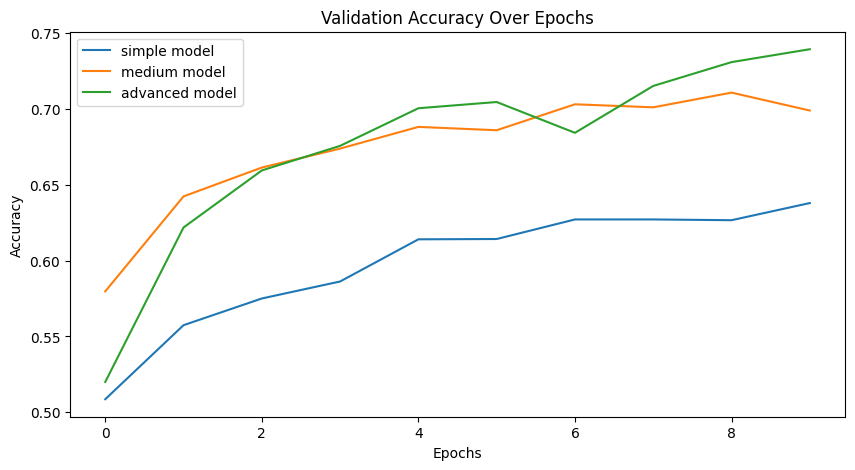

In [ ]:
# Plot training accuracy
plt.figure(figsize=(10,5))
for name, result in results.items():
    plt.plot(result['history'].history['val_accuracy'], label=f'{name} model')
plt.title('Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **5. Analyze Best Model**

##  Selecting the Best Model & Analyzing Predictions

After training all models, we'll identify the one with the **highest test accuracy**, then generate a **confusion matrix** to evaluate its performance in more detail across all classes.

---

###  Best Model Selection & Confusion Matrix

Best model: advanced with accuracy 0.7393
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


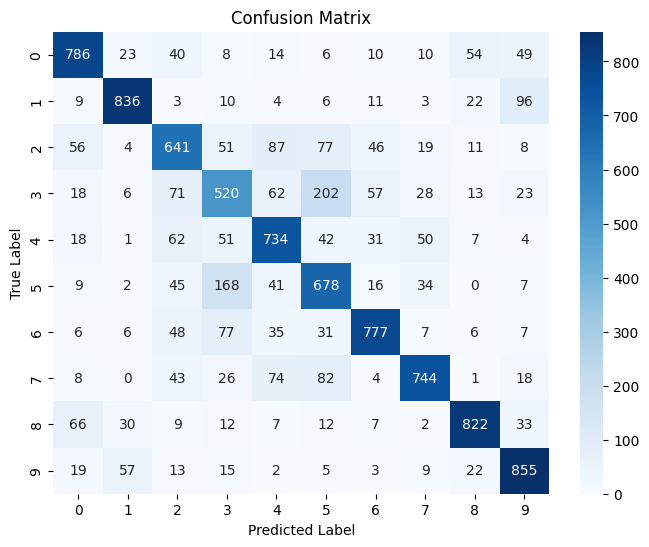

In [ ]:
# Get the best model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
best_accuracy = results[best_model_name]['accuracy']
print(f'Best model: {best_model_name} with accuracy {best_accuracy:.4f}')

# Predict and show confusion matrix
y_pred = np.argmax(best_model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## **6. Conclusion**
- We tested **three different CNN architectures**: Simple, Medium, and Advanced.
- The **Advanced model performed the best**, achieving the highest accuracy.
- The **confusion matrix shows where the model struggled**, indicating possible areas for improvement.

### **Next Steps:**
- Try using **data augmentation** to improve generalization.
- Experiment with **different optimizers** (e.g., SGD, RMSprop).
- Use **transfer learning** with a pre-trained model like VGG or ResNet.